#  Homework 2

Deadline: March 13th 11:59pm

Hand in: the homework must be handed in through the Moodle system. 

<span style="color:red">Provide a written answer if requested in the exercise! These questions are marked in red.</span>

---

## Exercise 1 

Exploratory data analysis (EDA) plays a very important role in data science projects. It helps us understand the data and explore the hidden relations between variables. Moreover, it helps us in the selection of the appropriate statistical and machine learning tools and techniques. In this problem we are going to perform an exploratory data analysis on 120 years of Olympics data. (65%)

**a)** Download the data from [this Kaggle data repository](https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results?select=athlete_events.csv) and load the athlete_event.csv file into a pandas DataFrame called olympics120. Filter the DataFrame so that it only contains data about the Summer season. **Hint:** one way to do this is with pandas query() function.

In [16]:
import requests
import pandas as pd
import csv

olympics120 = pd.read_csv('/Users/mac/Documents/Data_Science/hw02/athlete_events.csv')
olympics120 = olympics120.query('Season == "Summer"')
olympics120.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN


**b)** Retrieve some basic descriptive statistics about the dataset using the .describe() method of pandas DataFrames. Now, try to guess which sports have the shortest, tallest (height column), heaviest, lightest (weight column), youngest and oldest (age column) athletes in the Olympics. Then, check your guess based on the data! Print out which sport has the tallest, shortest, heaviest, lightest, youngest and oldest athletes.

In [17]:
olympics120.describe()

,ID,Age,Height,Weight,Year
count,222552.000000,213363.000000,170695.000000,168698.00000,222552.000000
mean,67998.925712,25.674053,175.515551,70.68906,1976.317094
std,39139.038228,6.699839,10.914725,14.80394,30.942802
min,1.000000,10.000000,127.000000,25.00000,1896.000000
25%,34000.750000,21.000000,168.000000,60.00000,1956.000000
50%,68302.500000,24.000000,175.000000,70.00000,1984.000000
75%,101881.000000,28.000000,183.000000,79.00000,2000.000000
max,135568.000000,97.000000,226.000000,214.00000,2016.000000


In [31]:
shortest_height = olympics120['Height'].min()
print("Height: " + str(shortest_height))
shortest_height_index = olympics120['Height'].idxmin()
sport_of_shortest = olympics120.loc[shortest_height_index, 'Sport']
print(sport_of_shortest)

Height: 127.0
Gymnastics


In [32]:
tallest_height = olympics120['Height'].max()
print("Height: " + str(tallest_height))
tallest_height_index = olympics120['Height'].idxmax()
sport_of_tallest = olympics120.loc[tallest_height_index, 'Sport']
print(sport_of_tallest)

Height: 226.0
Basketball


In [33]:
lightest_weight = olympics120['Weight'].min()
print("Weight: " + str(lightest_weight))
lightest_weight_index = olympics120['Weight'].idxmin()
sport_of_lightest = olympics120.loc[lightest_weight_index, 'Sport']
print(sport_of_lightest)

Weight: 25.0
Gymnastics


In [34]:
heaviest_weight = olympics120['Weight'].max()
print("Weight: " + str(heaviest_weight))
heaviest_weight_index = olympics120['Weight'].idxmax()
sport_of_heaviest = olympics120.loc[heaviest_weight_index, 'Sport']
print(sport_of_heaviest)

Weight: 214.0
Judo


In [35]:
youngest = olympics120['Age'].min()
print("Age: " + str(youngest))
youngest_index = olympics120['Age'].idxmin()
sport_of_youngest = olympics120.loc[youngest_index, 'Sport']
print(sport_of_youngest)

Age: 10.0
Gymnastics


In [36]:
oldest = olympics120['Age'].max()
print("Age: " + str(oldest))
oldest_index = olympics120['Age'].idxmax()
sport_of_oldest = olympics120.loc[oldest_index, 'Sport']
print(sport_of_oldest)

Age: 97.0
Art Competitions


**c)** Consider only the male athletes of the following sports: Basketball, Gymnastics, Wrestling. Make a scatter plot in which the x axis shows the athletes' weights and the y axis shows the athletes' heights. Each sport should be represented by a different color point on the plot. Make one scatter plot like this for the 2012 London Olympics, and another for the 1960 Rome Olympics. **Hints:** You can create the scatterplots with the .scatterplot() function of the seaborn package. You can place the scatterplots next to each other with the help of the .subplot() function of the matplotlib.pyplot package. You can fix the scales of the axes with the matplotlib.pyplot.xlim([lower, upper]) function. It is not required to use these hints, but seaborn and matplotlib are good libraries to explore for plotting:) 

<span style="color:red">What is the relationship between the heights and weights of athletes in these sports? How do these data differ for the 1960 and 2012 Olympics?</span> 

In [68]:
male_olympics120 = olympics120[olympics120['Sex']=='M']
filtered_olympics120 = male_olympics120.loc[male_olympics120['Sport'].isin(['Basketball', 'Gymnastics', 'Wrestling'])]
print(filtered_olympics120.head())

    ID                     Name Sex   Age  Height  Weight     Team  NOC  \
0    1                A Dijiang   M  24.0   180.0    80.0    China  CHN   
41  17  Paavo Johannes Aaltonen   M  28.0   175.0    64.0  Finland  FIN   
42  17  Paavo Johannes Aaltonen   M  28.0   175.0    64.0  Finland  FIN   
43  17  Paavo Johannes Aaltonen   M  28.0   175.0    64.0  Finland  FIN   
44  17  Paavo Johannes Aaltonen   M  28.0   175.0    64.0  Finland  FIN   

          Games  Year  Season       City       Sport  \
0   1992 Summer  1992  Summer  Barcelona  Basketball   
41  1948 Summer  1948  Summer     London  Gymnastics   
42  1948 Summer  1948  Summer     London  Gymnastics   
43  1948 Summer  1948  Summer     London  Gymnastics   
44  1948 Summer  1948  Summer     London  Gymnastics   

                                     Event   Medal  
0              Basketball Men's Basketball     NaN  
41  Gymnastics Men's Individual All-Around  Bronze  
42        Gymnastics Men's Team All-Around    Gold  


In [55]:
filtered_olympics120_1960 = filtered_olympics120[filtered_olympics120['Year']==1960]
print(filtered_olympics120_1960.head())

      ID             Name Sex  Age  Height  Weight                  Team  NOC  \
302  163  Ismail Abdallah   M  NaN     NaN     NaN  United Arab Republic  UAR   
303  163  Ismail Abdallah   M  NaN     NaN     NaN  United Arab Republic  UAR   
304  163  Ismail Abdallah   M  NaN     NaN     NaN  United Arab Republic  UAR   
305  163  Ismail Abdallah   M  NaN     NaN     NaN  United Arab Republic  UAR   
306  163  Ismail Abdallah   M  NaN     NaN     NaN  United Arab Republic  UAR   

           Games  Year  Season  City       Sport  \
302  1960 Summer  1960  Summer  Roma  Gymnastics   
303  1960 Summer  1960  Summer  Roma  Gymnastics   
304  1960 Summer  1960  Summer  Roma  Gymnastics   
305  1960 Summer  1960  Summer  Roma  Gymnastics   
306  1960 Summer  1960  Summer  Roma  Gymnastics   

                                      Event Medal  
302  Gymnastics Men's Individual All-Around   NaN  
303        Gymnastics Men's Team All-Around   NaN  
304         Gymnastics Men's Floor Exercise 

In [54]:
filtered_olympics120_2012 = filtered_olympics120[filtered_olympics120['Year']==2012]
print(filtered_olympics120_2012.head())

      ID                                  Name Sex   Age  Height  Weight  \
290  155  Mohamed Ibrahim Abd El-Fatah Mohamed   M  34.0   185.0    98.0   
434  241          Sayed Abdelmonem Sayed Hamed   M  23.0   170.0    60.0   
449  250                  Saeid Morad Abdevali   M  22.0   170.0    80.0   
588  338                  Muminzhon Abdullayev   M  22.0   190.0   130.0   
618  357                     Yusup Abdusalomov   M  34.0   170.0    84.0   

           Team  NOC        Games  Year  Season    City      Sport  \
290       Egypt  EGY  2012 Summer  2012  Summer  London  Wrestling   
434       Egypt  EGY  2012 Summer  2012  Summer  London  Wrestling   
449        Iran  IRI  2012 Summer  2012  Summer  London  Wrestling   
588  Uzbekistan  UZB  2012 Summer  2012  Summer  London  Wrestling   
618  Tajikistan  TJK  2012 Summer  2012  Summer  London  Wrestling   

                                              Event Medal  
290        Wrestling Men's Heavyweight, Greco-Roman   NaN  
43

In [50]:
import matplotlib.pyplot as plt

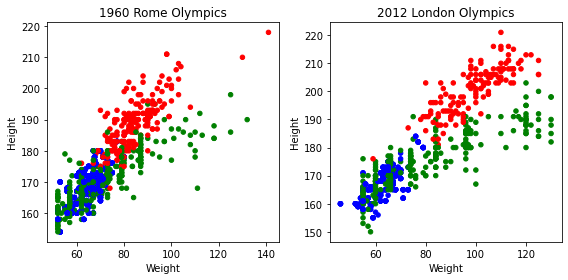

In [67]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,4))

colors = {'Basketball': 'Red', 'Gymnastics': 'Blue', 'Wrestling': 'Green'}

filtered_olympics120_1960.plot(kind='scatter', x='Weight', y='Height', ax=axes[0], c=filtered_olympics120_1960['Sport'].apply(lambda x:colors[x]))
axes[0].set_xlabel('Weight')
axes[0].set_ylabel('Height')
axes[0].set_title('1960 Rome Olympics')

filtered_olympics120_2012.plot(kind='scatter', x='Weight', y='Height', ax=axes[1], c=filtered_olympics120_2012['Sport'].apply(lambda x:colors[x]))
axes[1].set_xlabel('Weight')
axes[1].set_ylabel('Height')
axes[1].set_title('2012 London Olympics')

plt.tight_layout()

In [ ]:
#The above scatterplots show that athletes who play basketball are taller than athletes in Gymnastics and Wrestling.
#The shortest athletes amongst the three sports are those who do Gymnastics.
#The heaviest athletes amongst the three sports are those who do Wrestling.
#Compared to the Olympics in 1960, in 2012, athletes are more varied in the three sports.
#In 2012, Basketball athletes are taller and Wrestling athletes are heavier than those in 1960.

**d)** We are curious about which countries have the most gold medals per 1 million people. <br>
- Calculate how many gold medals the each country won per year at the Summer Olympics. **Hints:** You can filter the data with the query() function, keeping only the rows with gold medals. Then you can groupby() the country name and year attributes, and use .apply(lambda x: len(pd.unique(x))) on the Events column: <br> <br> gold_medals=DataFramegolds.groupby(['NOC', 'Year']).Event.apply(lambda x: len(pd.unique(x))) <br> <br> 
<span style="color:red">Describe what the above line of code is doing</span>


- Store this information in a new data frame containing the countries, year and number of gold metals. **Hints:** What is the type of the "gold_medals" variable you calculated in the last step? Try turning this object into lists using for example, list(gold_medals) and list(gold_medals.index). Now can you store the data from those lists in a new DataFrame? The new DataFrame should look something like this:
<table><tr><th></th><th>NOC</th><th>YEAR</th><th>GOLDMEDALS</th></tr><tr><td>1</td><td>ALG</td><td>1992</td><td>1</td></tr><tr><td>2</td><td>ALG</td><td>1996</td><td>2</td></tr></table>
- Using this dataframe, sum the number of gold metals per country across all years. **Hints:** You can groupby country and then call the .sum() function on the gold medals column. Update your dataframe to contain only the country names and the gold medals, something like this:
<table><tr><th></th><th>NOC</th><th>GOLDMEDALS</th></tr><tr><td>1</td><td>ALG</td><td>1</td></tr><tr><td>2</td><td>ANZ</td><td>3</td></tr></table>
- Load the population data from https://math.bme.hu/~pinterj/BevAdat1/Adatok/OlympicsPopulation.xlsx into a pandas DataFrame without downloading the file, then merge the two tables.
- Add a new column to the data frame which shows the number of gold medals per capita by dividing the number of gold medals by the country's population. Multiply this result by 1,000,000 to instead show the number of gold metals per one million people.
- Which countries have the most gold medals per one million people? **Hint:** You can use the pandas sort_values() function.

In [76]:
olympics120_gold_medals = olympics120[olympics120['Medal']=='Gold']
olympics120_gold_medals = olympics120_gold_medals[olympics120_gold_medals['Season']=='Summer']
print(olympics120_gold_medals)

            ID                                 Name Sex   Age  Height  Weight  \
3            4                 Edgar Lindenau Aabye   M  34.0     NaN     NaN   
42          17              Paavo Johannes Aaltonen   M  28.0   175.0    64.0   
44          17              Paavo Johannes Aaltonen   M  28.0   175.0    64.0   
48          17              Paavo Johannes Aaltonen   M  28.0   175.0    64.0   
79          21            Ragnhild Margrethe Aamodt   F  27.0   163.0     NaN   
...        ...                                  ...  ..   ...     ...     ...   
270981  135503                      Zurab Zviadauri   M  23.0   182.0    90.0   
271009  135520                          Julia Zwehl   F  28.0   167.0    60.0   
271016  135523       Ronald Ferdinand "Ron" Zwerver   M  29.0   200.0    93.0   
271049  135545                      Henk Jan Zwolle   M  31.0   197.0    93.0   
271076  135553  Galina Ivanovna Zybina (-Fyodorova)   F  21.0   168.0    80.0   

                  Team  NOC

In [77]:
gold_medals=olympics120_gold_medals.groupby(['NOC', 'Year']).Event.apply(lambda x: len(pd.unique(x)))
print(gold_medals)

NOC  Year
ALG  1992    1
     1996    2
     2000    1
     2012    1
ANZ  1908    1
            ..
YUG  1984    7
     1988    3
ZIM  1980    1
     2004    1
     2008    1
Name: Event, Length: 841, dtype: int64


In [ ]:
#The above line of code uses the dataframe that contains information of all the gold medalists in different Olympics
#The groupby function groups all the rows of country and year together in which those gold medals were won.
#The Event column is where all the names of the games are stored in which the gold medals were won.
#The lambda x function gets the unique events in those rows and then calculates the length of the list using len()
#The result is assigned to the variable gold_medal.

In [97]:
NOC_list = []
Year_list = []
gold_medals_list = []

for index, value in gold_medals.iteritems():
    NOC_list.append(index[0])
    Year_list.append(index[1])
    gold_medals_list.append(value)
    
    
data = {'NOC': NOC_list, 'YEAR': Year_list, 'GOLDMEDAL': gold_medals_list}

gold_medals_df = pd.DataFrame(data)
gold_medals_df.head()

,NOC,YEAR,GOLDMEDAL
0,ALG,1992,1
1,ALG,1996,2
2,ALG,2000,1
3,ALG,2012,1
4,ANZ,1908,1


In [98]:
gold_medals_by_country = gold_medals_df.groupby('NOC')["GOLDMEDAL"].sum().reset_index()
gold_medals_by_country_df = pd.DataFrame(gold_medals_by_country)
print(gold_medals_by_country_df)

     NOC  GOLDMEDAL
0    ALG          5
1    ANZ          3
2    ARG         21
3    ARM          2
4    AUS        147
..   ...        ...
102  UZB          9
103  VEN          2
104  VIE          1
105  YUG         26
106  ZIM          3

[107 rows x 2 columns]


In [99]:
url = 'https://math.bme.hu/~pinterj/BevAdat1/Adatok/OlympicsPopulation.xlsx'
population_df = pd.read_excel(url)
population_df.head()

,NOC,POPULATION
0,ARU,106766.0
1,NaN,677243299.0
2,AFG,38928341.0
3,NaN,458803476.0
4,ANG,32866268.0


In [110]:
merged_df = pd.merge(gold_medals_by_country_df, population_df, on='NOC')
merged_df.head()

,NOC,GOLDMEDAL,POPULATION
0,ALG,5,43851043.0
1,ARG,21,45376763.0
2,ARM,2,2963234.0
3,AUS,147,25687041.0
4,AUT,26,8917205.0


In [113]:
merged_df = merged_df.assign(GOLDMEDALS_PER_CAPITA = (merged_df['POPULATION'] / merged_df['GOLDMEDAL'])*1000000)
merged_df.head()

,NOC,GOLDMEDAL,POPULATION,GOLDMEDALS_PER_CAPITA
0,ALG,5,43851043.0,8.770209e+12
1,ARG,21,45376763.0,2.160798e+12
2,ARM,2,2963234.0,1.481617e+12
3,AUS,147,25687041.0,1.747418e+11
4,AUT,26,8917205.0,3.429694e+11


In [115]:
merged_df = merged_df.sort_values(by='GOLDMEDALS_PER_CAPITA', ascending=True)
merged_df.head()

,NOC,GOLDMEDAL,POPULATION,GOLDMEDALS_PER_CAPITA
31,FIN,104,5530719.0,5.317999e+10
40,HUN,178,9749763.0,5.477395e+10
6,BAH,6,393248.0,6.554133e+10
81,SWE,150,10353442.0,6.902295e+10
63,NOR,56,5379475.0,9.606205e+10


In [ ]:
#Finland has the most gold medals per capita in the World.

---

## Exercise 2

Let's improve on the model used in class: decision tree on the bank dataset. (35%) 

**a)** In class we solved a classification problem on the *bank.csv* dataset using the kNN algorithm. The classifier performed poorly. Repeat the analysis carried out in class (based on the Notebook02), but now use a decision tree, set the maximum depth to be 6! **Hint:** Use the *tree.DecisionTreeClassifier* classifier!


In [151]:
import pandas as pd
import csv
import requests
bank_data = pd.read_csv("/Users/mac/Documents/Data_Science/hw02/bank.csv", delimiter= " ", names = ['age', 'sex', 'region', 'income', 'married', 'children', 'car', 'save_acct', 'current_acct', 'mortgage', 'pep'])
bank_data.head()

,age,sex,region,income,married,children,car,save_acct,current_acct,mortgage,pep
0,48,FEMALE,INNER_CITY,17546.0,NO,1,NO,NO,NO,NO,YES
1,40,MALE,TOWN,30085.1,YES,3,YES,NO,YES,YES,NO
2,51,FEMALE,INNER_CITY,16575.4,YES,0,YES,YES,YES,NO,NO
3,23,FEMALE,TOWN,20375.4,YES,3,NO,NO,YES,NO,NO
4,57,FEMALE,RURAL,50576.3,YES,0,NO,YES,NO,NO,NO


In [152]:
bank_data.shape

(600, 11)

In [153]:
numeric_data = bank_data.replace(['MALE', 'FEMALE', 'NO', 'YES'],[0,1,0,1])
numeric_data.head()

,age,sex,region,income,married,children,car,save_acct,current_acct,mortgage,pep
0,48,1,INNER_CITY,17546.0,0,1,0,0,0,0,1
1,40,0,TOWN,30085.1,1,3,1,0,1,1,0
2,51,1,INNER_CITY,16575.4,1,0,1,1,1,0,0
3,23,1,TOWN,20375.4,1,3,0,0,1,0,0
4,57,1,RURAL,50576.3,1,0,0,1,0,0,0


In [154]:
numeric_data.shape

(600, 11)

In [155]:
one_hot = pd.get_dummies(numeric_data['region'])
one_hot.head()

,INNER_CITY,RURAL,SUBURBAN,TOWN
0,1,0,0,0
1,0,0,0,1
2,1,0,0,0
3,0,0,0,1
4,0,1,0,0


In [156]:
numeric_data = numeric_data.drop('region', axis=1)
numeric_data = numeric_data.join(one_hot)
numeric_data.head()

,age,sex,income,married,children,car,save_acct,current_acct,mortgage,pep,INNER_CITY,RURAL,SUBURBAN,TOWN
0,48,1,17546.0,0,1,0,0,0,0,1,1,0,0,0
1,40,0,30085.1,1,3,1,0,1,1,0,0,0,0,1
2,51,1,16575.4,1,0,1,1,1,0,0,1,0,0,0
3,23,1,20375.4,1,3,0,0,1,0,0,0,0,0,1
4,57,1,50576.3,1,0,0,1,0,0,0,0,1,0,0


In [157]:
bank_labels = numeric_data['pep']
bank_attrs = numeric_data.drop('pep', axis=1)
bank_attrs.head()

,age,sex,income,married,children,car,save_acct,current_acct,mortgage,INNER_CITY,RURAL,SUBURBAN,TOWN
0,48,1,17546.0,0,1,0,0,0,0,1,0,0,0
1,40,0,30085.1,1,3,1,0,1,1,0,0,0,1
2,51,1,16575.4,1,0,1,1,1,0,1,0,0,0
3,23,1,20375.4,1,3,0,0,1,0,0,0,0,1
4,57,1,50576.3,1,0,0,1,0,0,0,1,0,0


In [158]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [159]:
bank_features_train, bank_features_test, bank_labels_train, bank_labels_test = train_test_split(bank_attrs, bank_labels, test_size=0.33, random_state=42)

In [160]:
dt_classifier = DecisionTreeClassifier(max_depth=6)
dt_classifier.fit(bank_features_train, bank_labels_train)

DecisionTreeClassifier(max_depth=6)

In [161]:
predictions_binary = dt_classifier.predict(bank_features_test)
predictions_binary

array([1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1])

In [162]:
predictions_probability = dt_classifier.predict_proba(bank_features_test)
predictions_probability[0:10]

array([[0.        , 1.        ],
       [0.94827586, 0.05172414],
       [0.82352941, 0.17647059],
       [0.07692308, 0.92307692],
       [0.        , 1.        ],
       [0.25      , 0.75      ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.87096774, 0.12903226],
       [0.        , 1.        ]])

In [163]:
cm = metrics.confusion_matrix(bank_labels_test, predictions_binary)
print(cm)

[[87 11]
 [15 85]]


In [164]:
print("Precision: ", metrics.precision_score(bank_labels_test, predictions_binary))
print("Recall: ", metrics.recall_score(bank_labels_test, predictions_binary))
print("Accuracy: ", metrics.accuracy_score(bank_labels_test, predictions_binary))

Precision:  0.8854166666666666
Recall:  0.85
Accuracy:  0.8686868686868687


**b)** Now fit the tree using different parameters! Plot the ROC curve of the decision tree obtained in part a) and the new tree in the same figure (with different colors). Also plot the *y=x* diagonal line!

In [195]:
#Lets use different parameters now

In [196]:
#We use entropy this time which is used to maximize the information gain
#We use a random splitter to choose the data split randomly
clf = DecisionTreeClassifier(criterion='entropy', splitter='random')
clf.fit(bank_features_train, bank_labels_train)

DecisionTreeClassifier(criterion='entropy', splitter='random')

In [197]:
predictions = clf.predict(bank_features_test)
predictions

array([1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1])

In [198]:
predictions_probab = clf.predict_proba(bank_features_test)
predictions_probab[0:10]

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [199]:
cm = metrics.confusion_matrix(bank_labels_test, predictions)
print(cm)

[[71 27]
 [25 75]]


In [200]:
accuracy = metrics.accuracy_score(bank_labels_test, predictions)
precision = metrics.precision_score(bank_labels_test, predictions)
recall = metrics.recall_score(bank_labels_test, predictions)
print("Precision: ", precision)
print("Recall: ", recall)
print("Accuracy: ", accuracy)

Precision:  0.7352941176470589
Recall:  0.75
Accuracy:  0.7373737373737373


In [201]:
#For the Binary Class Predictions

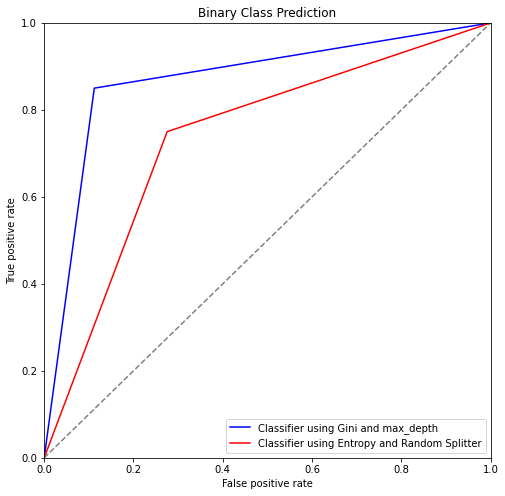

In [202]:
import matplotlib.pyplot as plt
import numpy as np
fpr1, tpr1, thresholds1 = metrics.roc_curve(bank_labels_test, predictions_binary, pos_label=1, sample_weight=None)
fpr2, tpr2, thresholds2 = metrics.roc_curve(bank_labels_test, predictions, pos_label=1, sample_weight=None)

plt.figure(figsize=(8,8))
plt.title('Binary Class Prediction')
plt.plot(fpr1, tpr1, color='blue', label='Classifier using Gini and max_depth')
plt.plot(fpr2, tpr2, color='red', label='Classifier using Entropy and Random Splitter')

#Plotting the y=x diagonal line
plt.plot(np.linspace(0,1,100), np.linspace(0,1,100), '--', color='gray')

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.xlim([0,1])
plt.ylim([0,1])
plt.legend()
plt.show()

In [203]:
metrics.roc_auc_score(bank_labels_test, predictions_binary, sample_weight=None)

0.8688775510204082

In [204]:
metrics.roc_auc_score(bank_labels_test, predictions, sample_weight=None)

0.7372448979591837

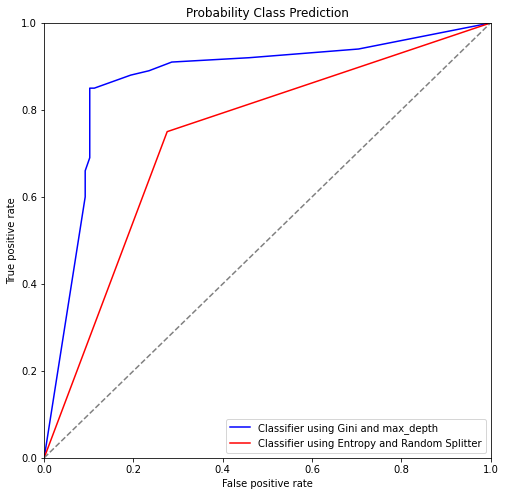

In [205]:
fpr1, tpr1, thresholds1 = metrics.roc_curve(bank_labels_test, predictions_probability[:,1], pos_label=1, sample_weight=None)
fpr2, tpr2, thresholds2 = metrics.roc_curve(bank_labels_test, predictions_probab[:,1], pos_label=1, sample_weight=None)

plt.figure(figsize=(8,8))
plt.title('Probability Class Prediction')
plt.plot(fpr1, tpr1, color='blue', label='Classifier using Gini and max_depth')
plt.plot(fpr2, tpr2, color='red', label='Classifier using Entropy and Random Splitter')

#Plotting the y=x diagonal line
plt.plot(np.linspace(0,1,100), np.linspace(0,1,100), '--', color='gray')

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.xlim([0,1])
plt.ylim([0,1])
plt.legend()
plt.show()

In [206]:
metrics.roc_auc_score(bank_labels_test,predictions_probability[:,1], sample_weight=None)

0.8692857142857142

In [207]:
metrics.roc_auc_score(bank_labels_test,predictions_probab[:,1], sample_weight=None)

0.7372448979591837

c) Plot and interpret the decision tree. The easiest way to do this is with the sklearn.tree.plot_tree function. Here's a useful article: https://pythoninoffice.com/how-to-a-plot-decision-tree-in-python/.

If you would like, you can try plotting the decision tree using the graphviz package too. Hints: Visualize the decision tree trained in part a) using the tree.export_graphviz function. To present the tree use the graphviz.Source function or the SVG function of the Ipython.display package! If graphviz is not installed you can install it using the Anaconda Navigator or by using pip install or by installing with homebrew, brew install graphviz. If it doesn't seem to work you can also download it from this link and inserting the following lines of codes (use the correct path for your downloaded file):

import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin')


Briefly interpret the results! According to what attribute did we split the tree first? Which were the usual splitting attributes?

In [209]:
from sklearn import tree
print(tree.export_text(dt_classifier))

|--- feature_2 <= 50051.70
|   |--- feature_4 <= 1.50
|   |   |--- feature_4 <= 0.50
|   |   |   |--- feature_3 <= 0.50
|   |   |   |   |--- feature_8 <= 0.50
|   |   |   |   |   |--- feature_0 <= 36.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_0 >  36.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_8 >  0.50
|   |   |   |   |   |--- feature_6 <= 0.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_6 >  0.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |--- feature_3 >  0.50
|   |   |   |   |--- feature_6 <= 0.50
|   |   |   |   |   |--- feature_8 <= 0.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_8 >  0.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_6 >  0.50
|   |   |   |   |   |--- feature_0 <= 31.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_0 >  31.50
|   |   |   |   |   |   |--- class: 0
|   |   |--- feature_4 >  0.50
|   | 

In [210]:
print(tree.export_text(clf))

|--- feature_3 <= 0.70
|   |--- feature_8 <= 0.32
|   |   |--- feature_4 <= 0.89
|   |   |   |--- feature_10 <= 0.14
|   |   |   |   |--- feature_7 <= 0.87
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_7 >  0.87
|   |   |   |   |   |--- feature_0 <= 30.32
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_0 >  30.32
|   |   |   |   |   |   |--- feature_2 <= 55480.23
|   |   |   |   |   |   |   |--- feature_0 <= 57.20
|   |   |   |   |   |   |   |   |--- feature_2 <= 21191.53
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- feature_2 >  21191.53
|   |   |   |   |   |   |   |   |   |--- feature_1 <= 0.95
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |--- feature_1 >  0.95
|   |   |   |   |   |   |   |   |   |   |--- feature_0 <= 38.19
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |   |--- feature_0 >  38.19
|   |   |   |   

In [223]:
!pip install graphviz

In [224]:
!pip install pydotplus

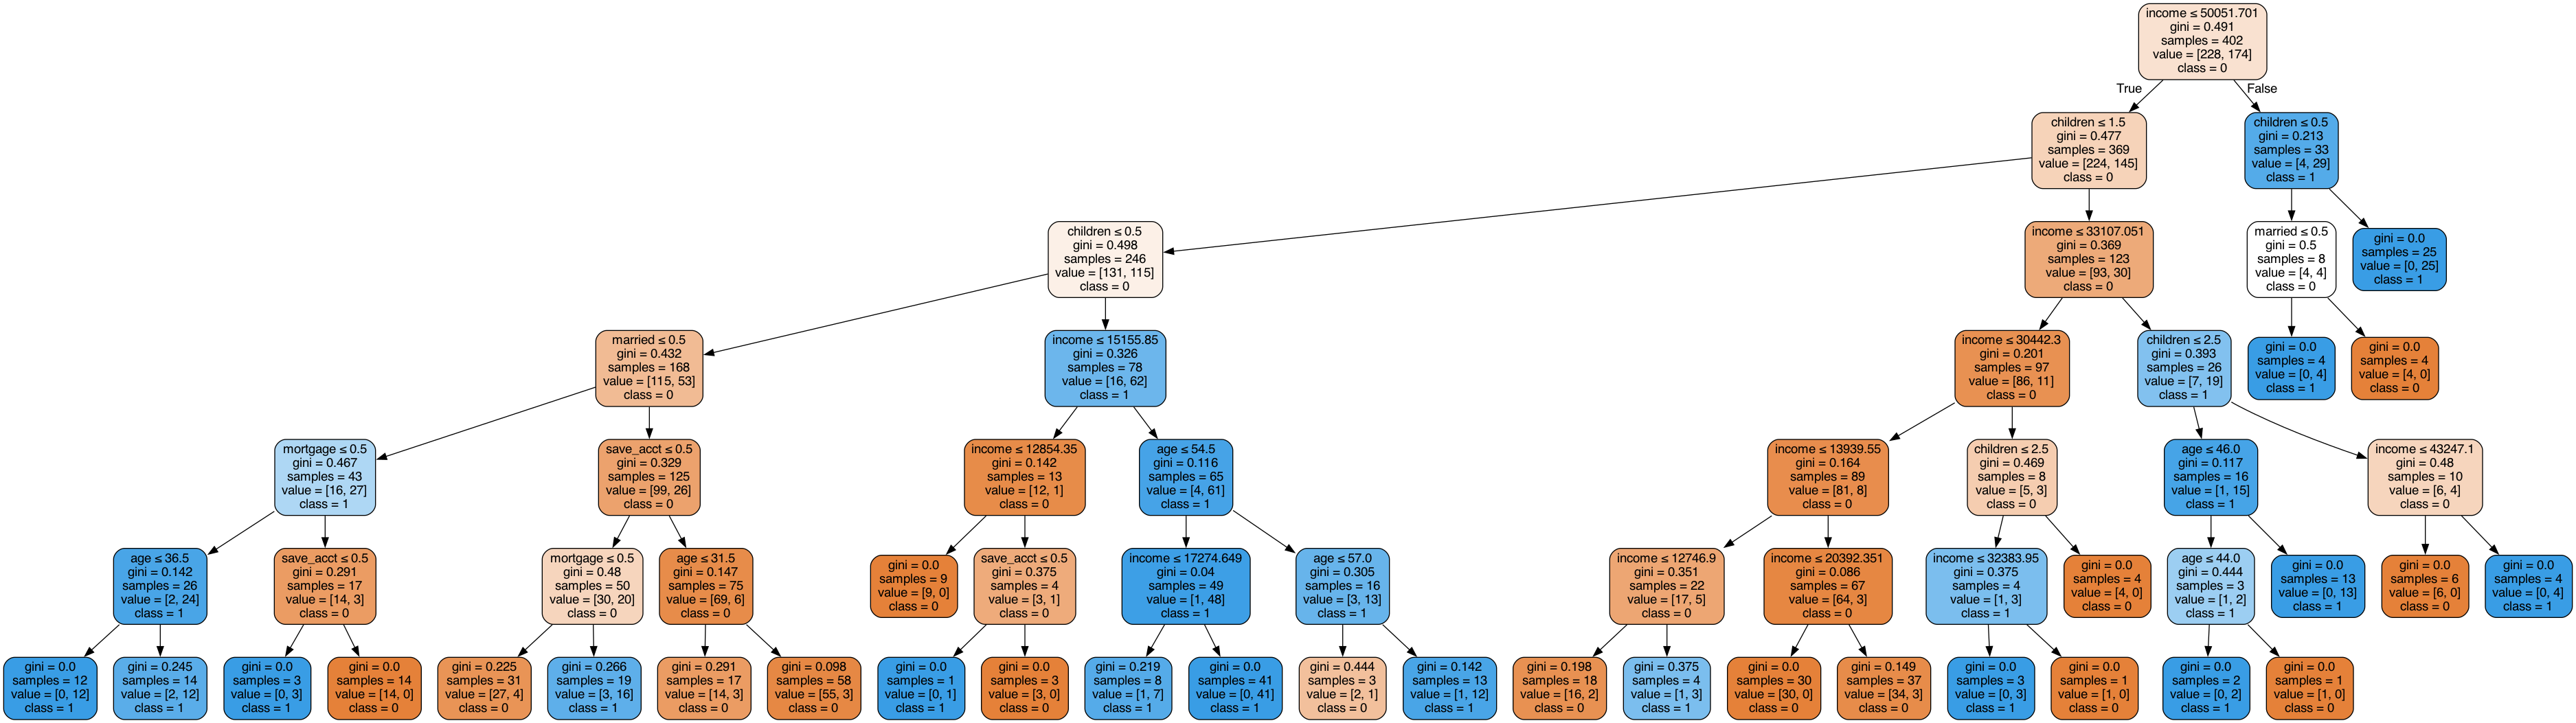

In [225]:
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz
import pydotplus

dot_data = export_graphviz(dt_classifier, out_file=None, feature_names=bank_features_train.columns, class_names=['0', '1'], filled=True, rounded=True, special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

In [ ]:
#There are 402 data samples in this decision tree. The left node is True and the right is False.
#The first split of the tree is based on income <= 50051.701
#All samples meeting the criteria (369) go in the left node and all those that dont (33) go in the right node
#Income and children were the most usual splitting attributes

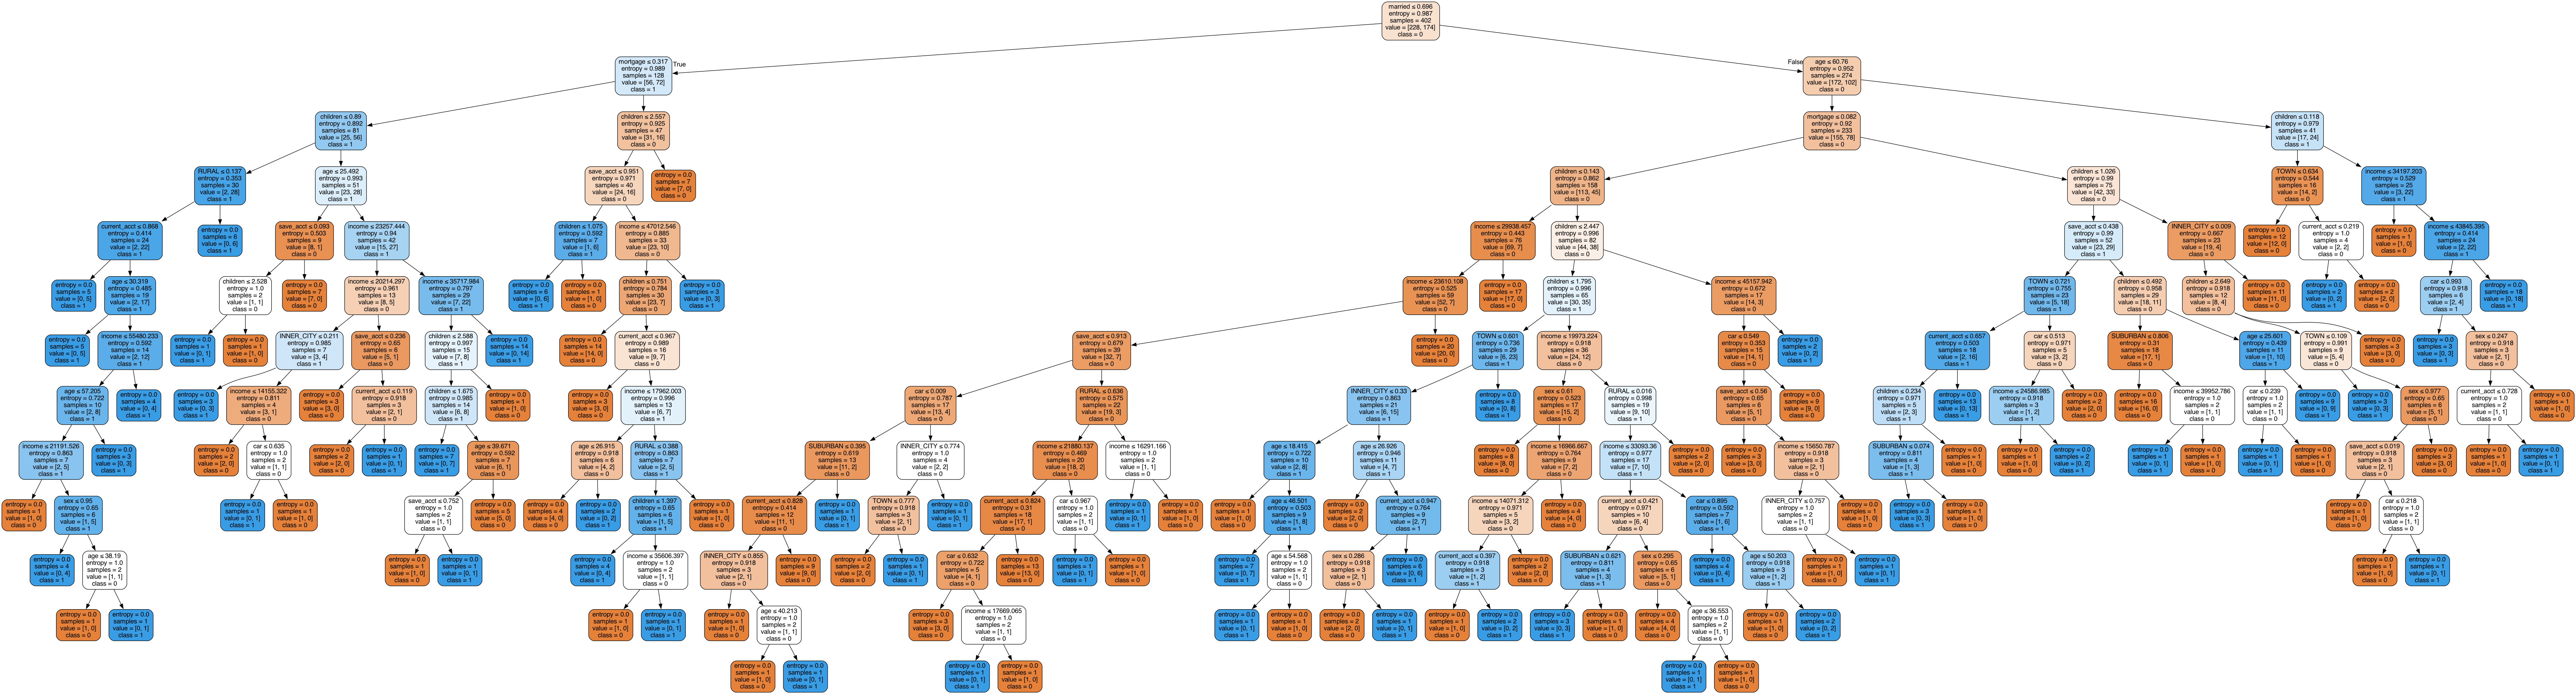

In [226]:
dot_data = export_graphviz(clf, out_file=None, feature_names=bank_features_train.columns, class_names=['0', '1'], filled=True, rounded=True, special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())